In [1]:
from Data import ParticleDataGenerator, ParticleDataset
import numpy as np
from torch.utils.data import DataLoader, random_split
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
def test():
    # Use the ParticleDataGenerator to generate data
    n = 1000
    n_scalar = 3
    energy_matrix_size = 7
    high_res_size = 500 # energy high resolution size
    generator = ParticleDataGenerator(num_data_points=n, num_scalars=n_scalar, energy_matrix_size=energy_matrix_size, high_res_size=high_res_size)

    # Generate the data
    category_mean_diff = 1 # difference of mean
    std_dev_ratio = 1 # ratio of std category1 and std category2
    category_ratio = 0.5 # category ratio
    scalar_inputs, energy_distributions, labels = generator.generate_data(category_mean_diff, std_dev_ratio, category_ratio)

    # Set up the figure for 3D plotting
    fig = plt.figure(figsize=(18, 6))

    # 3D plot for the scalar inputs
    ax1 = fig.add_subplot(131, projection='3d')

    # Plot scalar inputs for both categories
    category1_mask = labels.numpy().reshape(-1) == 0
    category2_mask = labels.numpy().reshape(-1) == 1

    ax1.scatter(scalar_inputs[category1_mask, 0], scalar_inputs[category1_mask, 1], scalar_inputs[category1_mask, 2], c='r', label='Category 1')
    ax1.scatter(scalar_inputs[category2_mask, 0], scalar_inputs[category2_mask, 1], scalar_inputs[category2_mask, 2], c='b', label='Category 2')

    # Set labels and title
    ax1.set_xlabel('Scalar Input 1')
    ax1.set_ylabel('Scalar Input 2')
    ax1.set_zlabel('Scalar Input 3')
    ax1.set_title('3D Scatter Plot of Scalar Inputs')
    ax1.legend()

    # 3D plot for the energy matrix of an example from category 1
    ax2 = fig.add_subplot(132, projection='3d')
    example_category_1 = energy_distributions[category1_mask][0]
    x, y = np.meshgrid(np.arange(7), np.arange(7))
    z = example_category_1.numpy()
    ax2.plot_surface(x, y, z, cmap='viridis')
    ax2.set_title('Energy Distribution of Category 1')
    ax2.set_xlabel('X-axis')
    ax2.set_ylabel('Y-axis')
    ax2.set_zlabel('Energy')

    # 3D plot for the energy matrix of an example from category 2
    ax3 = fig.add_subplot(133, projection='3d')
    example_category_2 = energy_distributions[category2_mask][0]
    z = example_category_2.numpy()
    ax3.plot_surface(x, y, z, cmap='plasma')
    ax3.set_title('Energy Distribution of Category 2')
    ax3.set_xlabel('X-axis')
    ax3.set_ylabel('Y-axis')
    ax3.set_zlabel('Energy')

    # Show the plot
    plt.tight_layout()
    plt.show()
    

number of data:
category 1:  500
category 2:  500
std:
category 1:  [1, 1]
category 2:  [1, 1]
scalar input shape:
category 1:  (500, 3)
category 2:  (500, 3)
category 1 & 2:  (1000, 3)
covariance of x, y: 
category 1:  [[1, 0.5], [0.5, 1]]
category 2:  [[1, 0.5], [0.5, 1]]
10
mean of x, y: 
category 1:  [-5.0, -5.0]
category 2:  [5.0, 5.0]


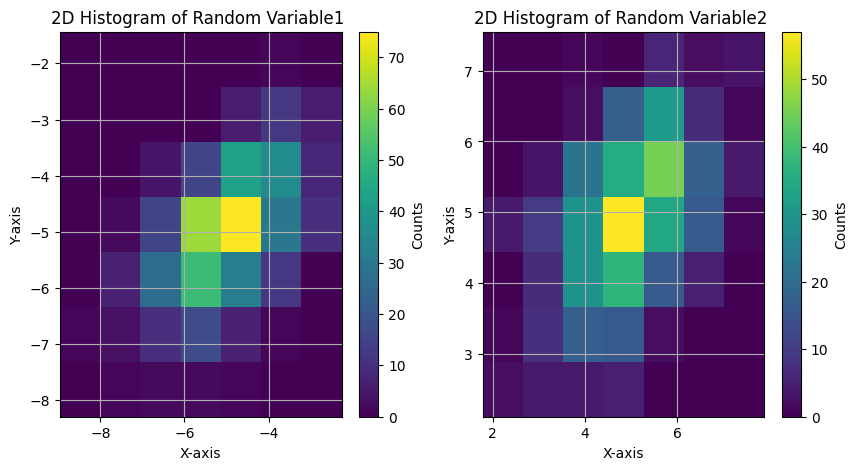

energy distribution shape:  (1000, 7, 7)


In [18]:
category_mean_diff = 10 # difference of mean
std_dev_ratio = 1 # ratio of std category1 and std category2
category_ratio = 0.5 # category ratio
high_res_size = 500 # energy high resolution size
generator = ParticleDataGenerator(num_data_points=1000, num_scalars=3, energy_matrix_size=7, high_res_size=high_res_size, seed=42)
scalar_inputs, energy_distributions, labels = generator.generate_data(category_mean_diff, std_dev_ratio, category_ratio)

In [20]:
# Create the dataset
particle_dataset = ParticleDataset(scalar_inputs, energy_distributions, labels)

# Create a DataLoader instance
batch_size = 8
particle_dataloader = DataLoader(particle_dataset, batch_size=batch_size, shuffle=True)

# We can iterate over the DataLoader
# Here's how we can get the first batch of data
first_batch = next(iter(particle_dataloader))

# Output the shapes of the data in the first batch
print(first_batch[0].shape, first_batch[1].shape, first_batch[2].shape)

torch.Size([8, 3]) torch.Size([8, 7, 7]) torch.Size([8, 1])


In [21]:
first_batch[0]

tensor([[-5.2442, -4.0359, -3.8105],
        [-5.1209, -4.5805, -5.8875],
        [-5.2191, -4.1706, -7.2111],
        [-4.4991, -5.9776, -4.9007],
        [ 5.4999,  3.6007,  5.3676],
        [-4.6055, -5.4210, -4.7102],
        [-5.4375, -4.2776, -5.3728],
        [-4.4392, -3.9169, -3.9462]])

In [22]:
first_batch[1]

tensor([[[ 2.,  1.,  0.,  0.,  0.,  0.,  0.],
         [ 2., 12.,  9.,  8.,  4.,  0.,  0.],
         [10., 24., 45., 36., 15.,  4.,  0.],
         [ 2., 11., 40., 56., 43., 10.,  1.],
         [ 0.,  0., 15., 39., 41., 20.,  3.],
         [ 0.,  0.,  3., 15., 12., 14.,  1.],
         [ 0.,  0.,  0.,  1.,  1.,  0.,  0.]],

        [[ 2.,  5.,  6.,  5.,  1.,  0.,  0.],
         [ 2., 12., 19., 17.,  5.,  1.,  0.],
         [ 2.,  9., 46., 50., 28.,  5.,  1.],
         [ 0., 10., 25., 56., 42., 19.,  2.],
         [ 0.,  1.,  5., 30., 36., 20.,  5.],
         [ 0.,  0.,  1.,  7., 10.,  7.,  4.],
         [ 0.,  0.,  0.,  0.,  1.,  2.,  1.]],

        [[ 3.,  1.,  4.,  6.,  1.,  0.,  0.],
         [ 6.,  8., 21., 12.,  4.,  2.,  0.],
         [ 2., 16., 36., 33., 21.,  4.,  1.],
         [ 2., 21., 38., 60., 40.,  7.,  2.],
         [ 0.,  5., 23., 26., 28., 15.,  3.],
         [ 0.,  2.,  5.,  8., 12., 12.,  4.],
         [ 0.,  0.,  0.,  2.,  2.,  0.,  2.]],

        [[ 3.,  4.,  7.,  2.

In [23]:
first_batch[2]

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.]])